## **수능 Trend Visualization (1)**

![이미지=SBS](https://user-images.githubusercontent.com/72365693/103843767-c64e1d00-50db-11eb-8cf0-3c786ebb3f53.jpg)

+ 대학수학능력시험은 94학번 이후 대학 진학을 결정하는 시험입니다.
+ 얼마 전에 끝난 2021학년도 수능을 포함해 29회의 수능이 있었습니다.
+ 근 30년간 응시생과 점수에 대한 트렌드를 확인해 보겠습니다.

### **1. 데이터**

#### **1.1 데이터 확보**

> [한국교육과정평가원 대학수학능력시험 정보](https://www.data.go.kr/data/15001549/fileData.do)

+ 수학능력시험 관련 데이터는 [공공데이터 포털](https://www.data.go.kr/data/15001549/fileData.do)에서 다운받을 수 있습니다.
+ 여러 데이터가 hwp와 csv형태로 주어집니다.
+ 이를 정리하고, 파이썬에서 활용하기 쉽도록 컬럼명을 영문으로 바꿉니다.
    + **학년도**:year
    + **지원자 수**:num_total
    + **남성 지원자 수**:num_M
    + **여성 지원자 수**:num_F
    + **재학생**:cat_go3
    + **졸업생**:cat_grad
    + **검정 등**:cat_ged
    + **응시자 수**:num_test
    + **평균점수 (전체)**:score_avg
    + **평균점수 (남성)**:score_avg_M
    + **평균점수 (여성)**:score_avg_F
    + **평균점수 (재학생)**:score_avg_go3
    + **평균점수 (졸업생)**:score_avg_grad
    + **평균점수 (전체 상위 50%)**:score_t50_avg
    + **평균점수 (남성 상위 50%)**:score_t50_avg_M
    + **평균점수 (여성 상위 50%)**:score_t50_avg_F
    + **평균점수 (재학생 상위 50%)**:score_t50_avg_go3
    + **평균점수 (졸업생 상위 50%)**:score_t50_avg_go3

#### **1.2 데이터 확인**
+ 주피터 노트북에서 데이터를 불러옵니다.

In [1]:
import matplotlib 
print('matplotlib: {}'. format(matplotlib. __version__))

matplotlib: 3.3.2


In [2]:
import pandas as pd

df_sn = pd.read_csv("sn_apply.csv")
df_sn.head()

,year,num_total,num_M,num_F,cat_go3,cat_grad,cat_ged,num_test,score_avg,score_avg_M,score_avg_F,score_avg_go3,score_avg_grad,score_t50_avg,score_t50_avg_M,score_t50_avg_F,score_t50_avg_go3,score_t50_avg_grad
0,1994,742668,437465,305203,521806,213459,7403,716326,49.2,49.7,48.5,49.0,49.6,61.7,62.6,60.2,NaN,NaN
1,1994,750181,444612,305569,496617,243826,9738,726634,44.5,44.6,44.3,45.2,43.2,54.8,55.7,53.5,NaN,NaN
2,1995,781749,452360,329389,477960,261492,42297,757488,49.7,49.7,49.8,51.2,47.8,63.2,63.3,60.7,NaN,NaN
3,1996,840661,478707,361954,526833,300482,13346,809867,46.1,46.0,46.1,47.0,44.4,57.7,58.6,56.6,NaN,NaN
4,1997,824374,472527,351847,545023,268044,11307,795338,42.7,42.4,43.1,43.6,40.8,54.1,55.1,52.9,NaN,NaN


+ 데이터가 모두 온전한지도 봅니다.

In [3]:
df_sn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                29 non-null     int64  
 1   num_total           29 non-null     int64  
 2   num_M               29 non-null     int64  
 3   num_F               29 non-null     int64  
 4   cat_go3             29 non-null     int64  
 5   cat_grad            29 non-null     int64  
 6   cat_ged             29 non-null     int64  
 7   num_test            29 non-null     int64  
 8   score_avg           9 non-null      float64
 9   score_avg_M         9 non-null      float64
 10  score_avg_F         9 non-null      float64
 11  score_avg_go3       9 non-null      float64
 12  score_avg_grad      9 non-null      float64
 13  score_t50_avg       9 non-null      float64
 14  score_t50_avg_M     9 non-null      float64
 15  score_t50_avg_F     9 non-null      float64
 16  score_t50_

+ 점수 데이터 부분에 결측치가 상당합니다.
    + **재학생과 졸업생의 상위 50% 점수는 단 두 건**입니다.
        +이건 그리지 맙시다.
    + **29번의 수능 중 9번만 점수 데이터가 있습니다.**
    + 2002학년도부터 총점을 공개하지 않고 표준점수 등으로 변환해서 공개한 결과입니다.
    + 동일 기준으로 분석하기 어려워 **점수 분석은 94~01까지만** 합니다.

### **2. 데이터 시각화**

#### **2.1 시각화 준비**


+ matplotilb을 비롯한 라이브러리들을 불러옵니다.
+ 한글을 사용할 것이므로 한글 설정도 합니다.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 사전 준비
sns.set_context("talk")
sns.set_style("white")

# 한글 사용 준비
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

#### **2.2 시각화 색상 선정**

+ matplotlib과 seaborn 말고 다른 색을 사용해 봅시다.
+ 인터넷은 넓고 좋은 그림은 많습니다.
+ [논문 그림](https://www.nature.com/articles/s41598-018-31704-y)과[구글링 결과 중 일부](https://www.tableau.com/learn/articles/best-beautiful-data-visualization-examples)를 가져옵니다.

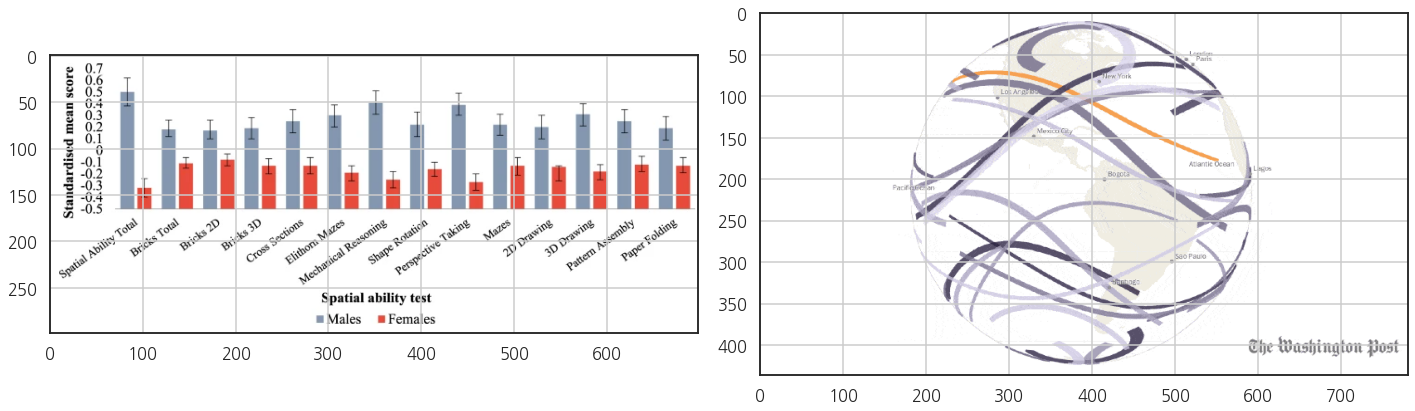

In [5]:
# 이미지 가져오기
ex0 = plt.imread("48_sn_colorexample1.png")
ex1 = plt.imread("48_sn_colorexample2.png")

fig,axs = plt.subplots(ncols = 2, figsize = (20,10))
for i,(ax,ex) in enumerate(zip(axs,[ex0, ex1])):
    ax.imshow(ex)
    ax.grid()
    
fig.tight_layout()

+ 남성과 여성, 그리고 지원자와 응시자를 뽑을 색상을 고릅니다.
+ 색상을 뽑을 자리에 원을 그려서 표시합니다.

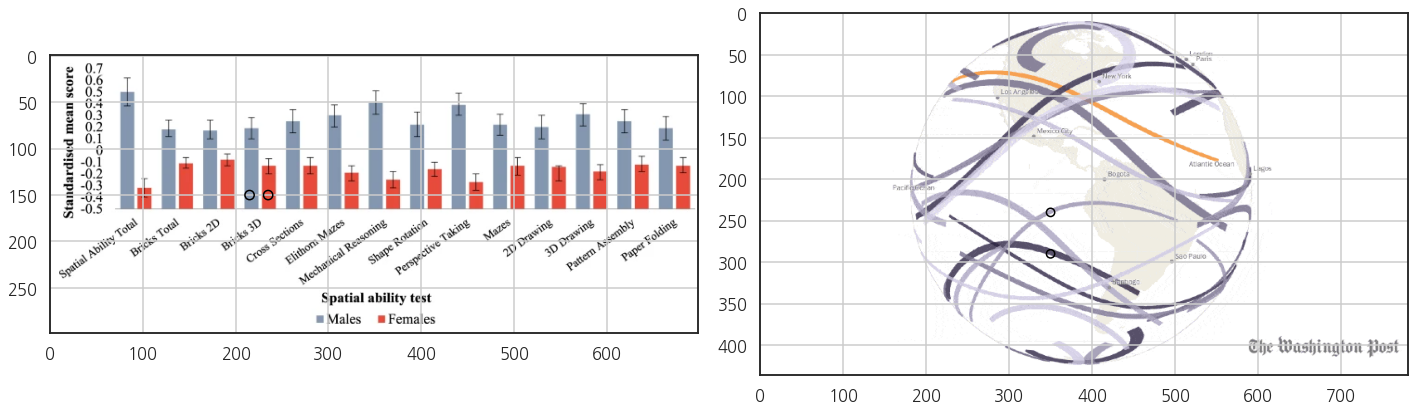

In [6]:
from matplotlib.patches import Circle


circle_F = Circle((235, 150), radius=5, edgecolor="k", facecolor="none") # 여성
circle_M = Circle((215, 150), radius=5, edgecolor="k", facecolor="none") # 남성
circle_total = Circle((350, 290), radius=5, edgecolor="k", facecolor="none") # 지원자
circle_test = Circle((350, 240), radius=5, edgecolor="k", facecolor="none")  # 응시자

fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
for i, (ax, ex) in enumerate(zip(axs, [ex0, ex1])):
    ax.imshow(ex)
    ax.grid()

# 원 그리기    
axs[0].add_patch(circle_F)
axs[0].add_patch(circle_M)
axs[1].add_patch(circle_total)
axs[1].add_patch(circle_test)

fig.tight_layout()

+ 뽑은 색상을 확인해 봅니다.

In [7]:
color_M = ex0[150, 235]
color_M

array([0.9019608 , 0.29803923, 0.23137255, 1.        ], dtype=float32)

+ 데이터가 4개입니다.
+ 각기 Red, Green, Blue, Alpha를 의미합니다.
+ 투명도는 나중에 `alpha=`로 별도로 넣기로 하고, RGB값만 가져옵니다.

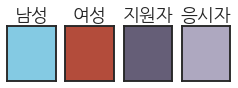

In [8]:
color_F = ex0[150, 235][:3] + np.array([-0.2, 0, 0])
color_M = ex0[150, 215][:3] + np.array([0, 0.2, 0.2])
color_total = ex1[290, 350][:3]
color_test = ex1[240, 350][:3]

fig, axs = plt.subplots(ncols=4, figsize=(4, 1))
for ax, c, t in zip(axs, 
                    [color_M, color_F, color_total, color_test],
                    ["남성", "여성", "지원자", "응시자"]):
    ax.set_facecolor(c)
    ax.set_title(t)
    ax.set_xticks([])
    ax.set_yticks([])

+ 뽑은 그대로의 색상에선 여성과 응시자각 잘 구분되지 않았습니다.
+ **색상이 numpy array 형식**이므로 array를 더해서 수정했습니다.

#### **2.3 지원자와 응시자**

+ 인구 감소에 따라 수능을 점점 적게 본다고 합니다.
+ 얼마나 적게 보는지 확인해 봅시다.

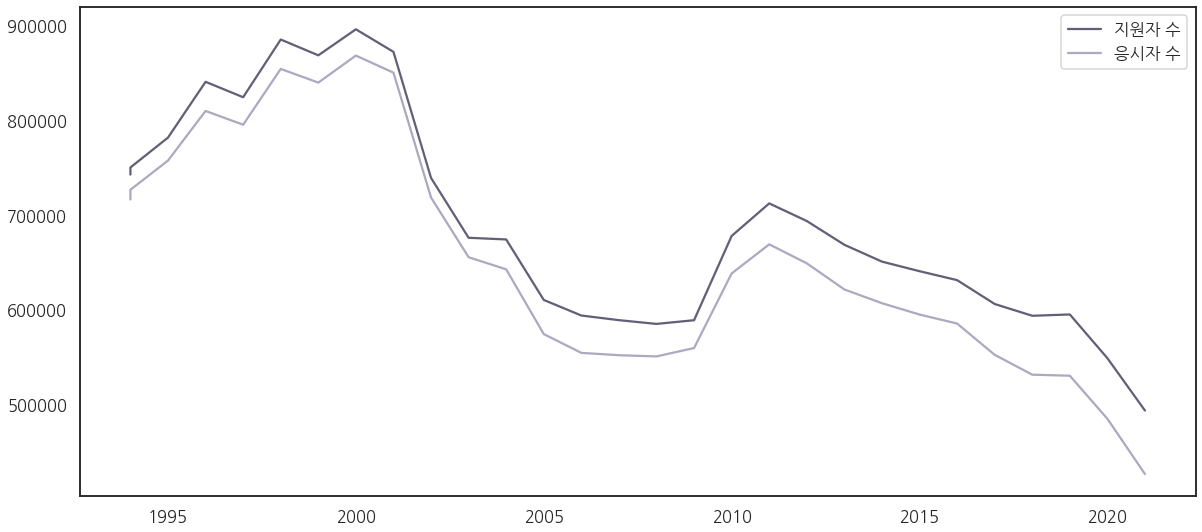

In [9]:
fig, ax = plt.subplots(figsize=(20, 9))

# 지원자 수 
ax.plot(df_sn["year"], df_sn["num_total"], color=color_total, label="지원자 수")

# 응시자 수
ax.plot(df_sn["year"], df_sn["num_test"], color=color_test, label="응시자 수")

# 범례 추가
ax.legend()

#### **2.4 y축 범위, plot 모양변경**

+ 응시자 수가 바닥으로 처박힙니다.
+ 내년부턴 당장 수능이 없어질 것 같습니다.
+ **y축이 0부터 시작**해야 올바른 비교가 가능합니다.
+ 두 선을 잘 구분하기 위해 marker를 추가합니다.

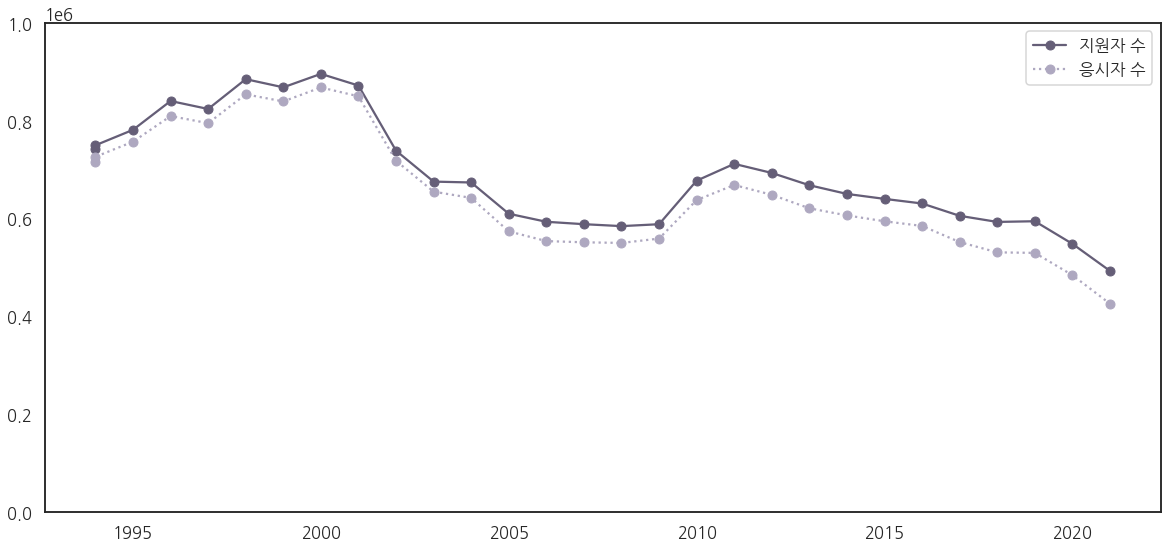

In [10]:
fig, ax = plt.subplots(figsize=(20,9))

# 마커추가, 선모양 변경
ax.plot(df_sn["year"], df_sn["num_total"], 'o-', color=color_total, label ="지원자 수")
ax.plot(df_sn["year"], df_sn["num_test"], 'o:', color=color_test, label = "응시자 수")
# o- : 실선 o: 점선


# y축 범위 변경
ax.set_ylim(0,1000000)

# 범례추가
ax.legend()


#### **2.5 y축 숫자 표현 바꾸기**

+ y축 숫자를 읽기 어렵습니다.
+ **만명** 단위로 바꿔줍시다.

##### **2.5.1 실패: yticklabels**

+ y축 숫자는 yticklabels로 제어합니다,
+ `get_yticklabels()`로 받아서 `set_yticklabels()`로 바꿔넣으면 될 것 같습니다.
+ 내친 김에 수능을 두 번 보는 사람에 꺾인 **1994년 데이터 하나를 빼고**그립니다.

[      0.  200000.  400000.  600000.  800000. 1000000.]
[Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]


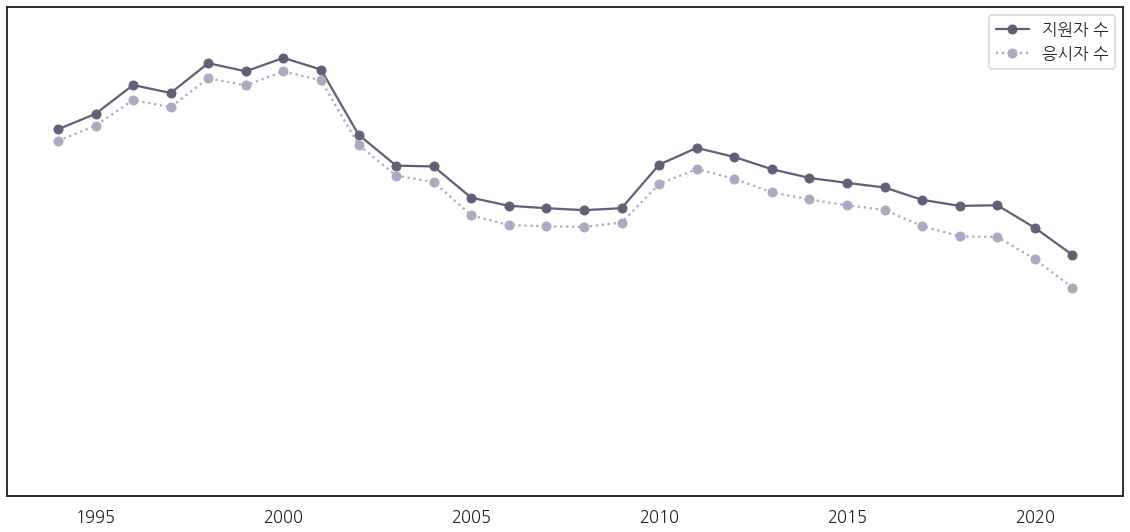

In [11]:
fig, ax = plt.subplots(figsize=(20, 9))

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
print(yticks)
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
print(yticklabels)
ax.set_yticklabels([y for y in yticklabels]) # yticklabels 사용

ax.legend()

+ 나는 숫자를 더 좋게 표현하고 싶었을 뿐입니다.
+ 그런데 **숫자가 사라져버립니다!**
+ 왜 그런 걸까요?

In [13]:
print(yticklabels)

[Text(0, 0.0, ''), Text(0, 200000.0, ''), Text(0, 400000.0, ''), Text(0, 600000.0, ''), Text(0, 800000.0, ''), Text(0, 1000000.0, '')]


+ yticklabels를 출력하면 이유를 알 수 있습니다.
+ 숫자가 들어있어야 할 `''` 안쪽이 비어있고, 대신 눈금(yticks)에 숫자가 있습니다.
+ `.plot()`**은 ticklabels에 값이 들어가지 않습니다.**
+ 이 문제는 **seaborn의 lineplot도 똑같이** 가지고 있습니다.

##### **2.5.2 성공: yticks**

+ yticks를 받아서 넣어봅니다.

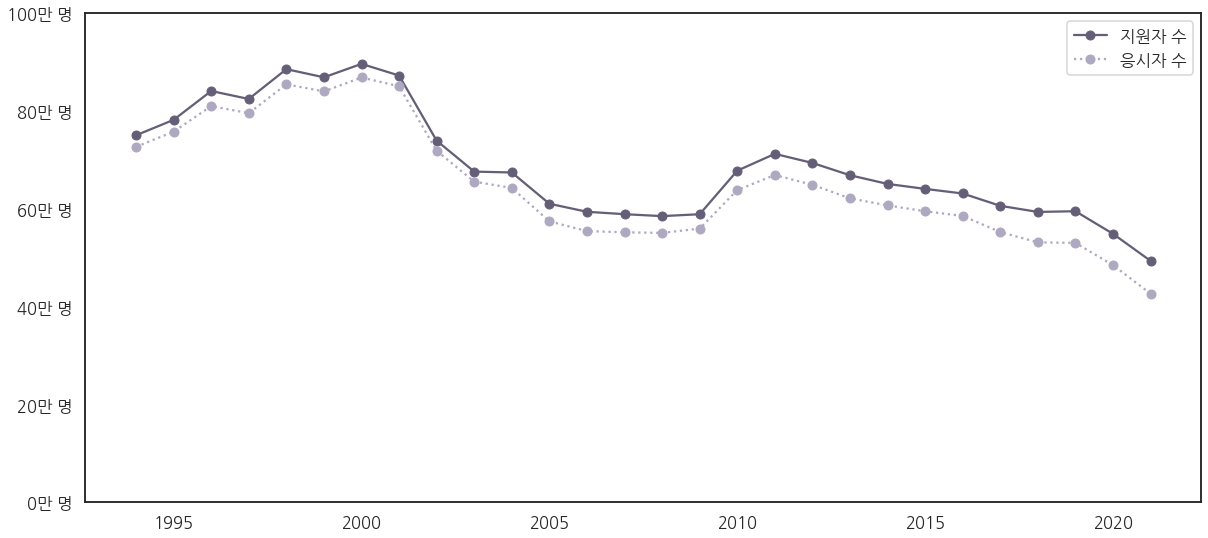

In [14]:
# step 3. 데이터 표현 바꾸기 (2)-성공

fig, ax = plt.subplots(figsize=(20, 9))

# 데이터 범위 수정
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

# ylim 범위 수정
ax.set_ylim(0, 1000000)

# yticklabel 표현 수정
yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks]) # yticks 사용

ax.legend()

+ yticklabels가 의도대로 출력됩니다.
+ 코드를 보면 `set_yticks()`는 아무 일도 하지 않고 있습니다.
+ `get_ticks()` 으로 받은 후에 `set_yticks()` 으로 그냥 넣거든요.

+ 그러나 같이 사용해야 합니다.
+ **문법상** `set_yticklabels()` **는** `set_yticks()` **뒤에 와야 하기 때문입니다.**

#### **2.6 남녀 수험생 수 함께 그리기**  

+ 총 수를 그렸으니 이번엔 남녀 수를 따로 그려봅니다.
+ 남성과 여성이 나란하게 있는 bar plot을 사용합시다.
+ matplotilb으로도 가능하지만 이런 표현은 **pandas가 더 편리합니다.**

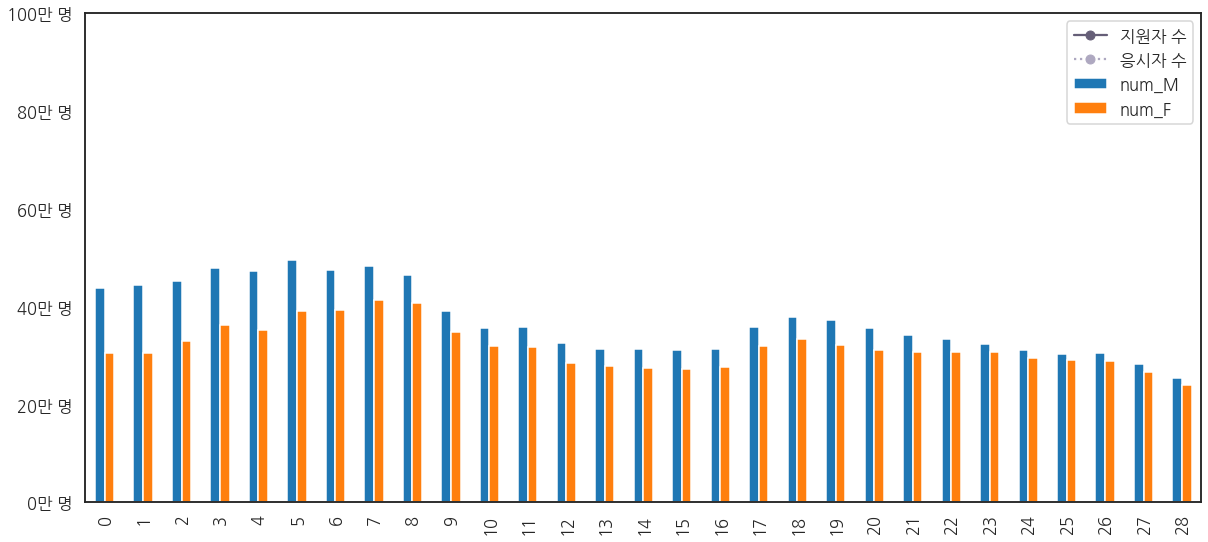

In [15]:
fig, ax = plt.subplots(figsize=(20, 9))

# pandas bar plot
ax = df_sn[["num_M", "num_F"]].plot.bar(ax=ax)

ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

# loc 특정 행에 해당하는 경우를 보는 경우
# Ex) loc[0:4] : 0~4번 인덱스에 해당하는 5개의 행을 가진 데이터프레임이 정상적으로 반환
 
ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

+ 아까 그렸던 **총 지원자와 응시자 수가 사라졌습니다.**

##### **2.6.1 쪼개서 원인 분석(1)**

+ 두 그림을 따로 그려서 그려지기는 하는지 확인해 봅니다.

(0.0, 1000000.0)

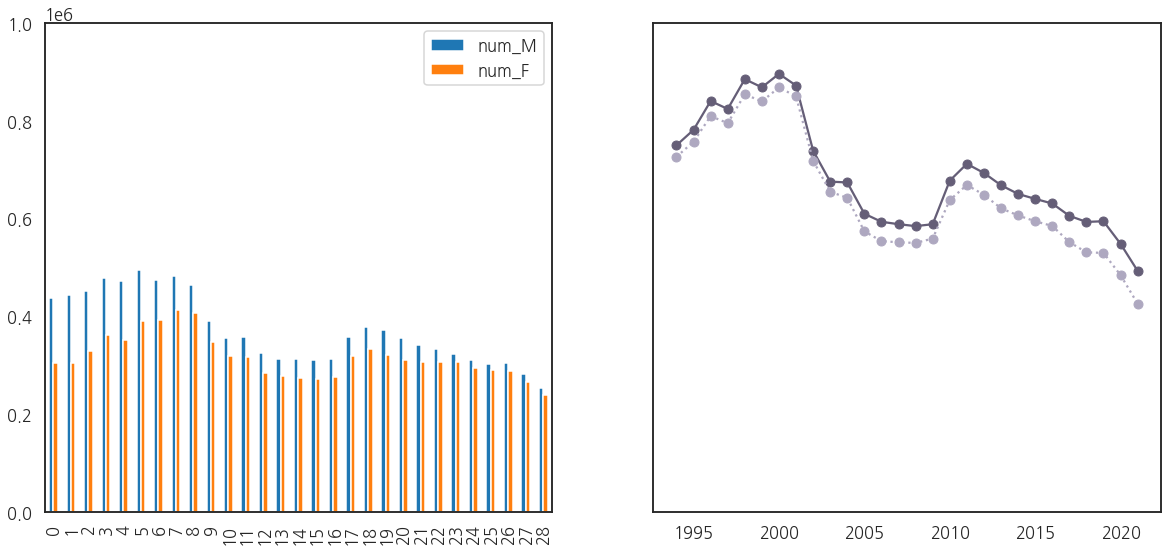

In [16]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)
# sharex : Xtick의 값을 각각 공유할지 안할지
# sharey : Ytick의 값을 각각 공유할지 안할지

df_sn[["num_M", "num_F"]].plot.bar(ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

+ 멀쩡히 잘 그려지고 있습니다.
+ 그런데 왜 안나올까요? **x축 범위가 수상합니다.**
+ 확인해봅니다.

In [17]:
xticks0 = axs[0].get_xticks() 
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


+ 문제의 원인을 알았습니다.
+ **하나는 0 ~ 28, 하나는 1990 ~ 2025**에서 그리고 있었던 겁니다.
+ bar plot을 그릴 때 x 범위를 지정하지 않았기 때문에 벌어진 일입니다.

##### **2.6.3 쪼개서 원인 분석 (2)** 

+ 그럼, pandas로 그리는 bar plot에 x축 데이터를 넣어줍시다.
+ year가 1994부터 2021까지이니 잘 될 것 같습니다.

(0.0, 1000000.0)

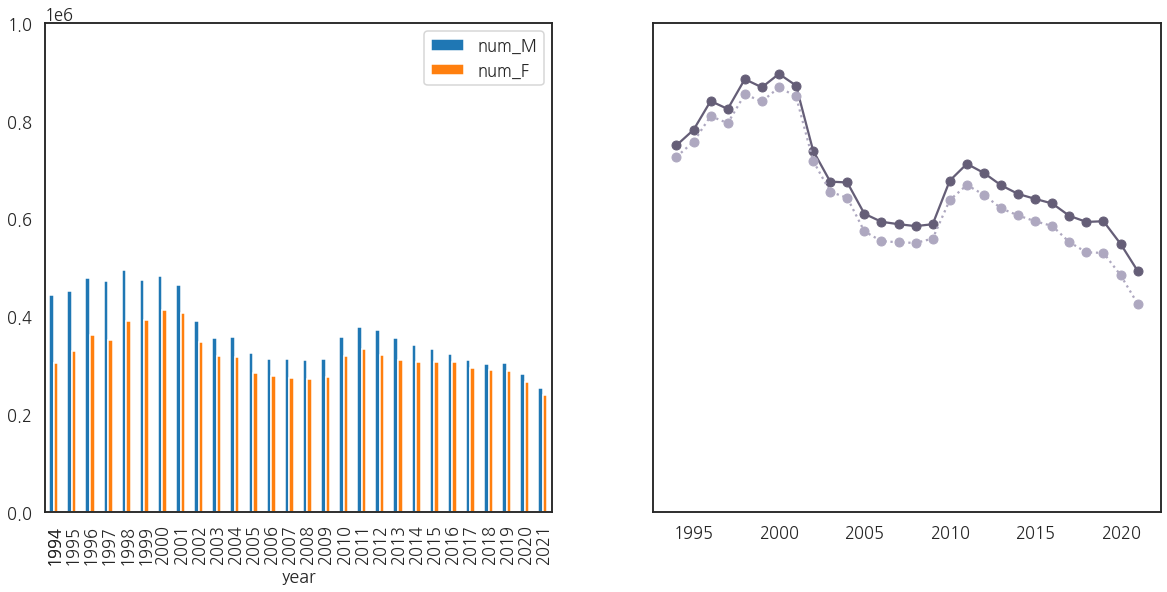

In [18]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

# x 데이터 추가
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0])

axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "year"], df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

+ bar plot의 x축이 1994부터 2021까지인데도 여전히 안됩니다.
+ 다시 x축 범위를 확인합니다.

In [19]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [1994 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021]
xticks of axs[1] = [1990. 1995. 2000. 2005. 2010. 2015. 2020. 2025.]


+ 아까랑 똑같습니다.
+ 왜냐면, pandas가 그리는 bar plot은 **index를 x축으로** 사용합니다.
+ **pandas에 x를 넣어도 xticklabels만 고치는 겁니다.**

##### **2.6.3 쪼개서 원인 분석(3)**

+ 이번엔 `plot()`에서 **x를 제거**해 봅시다.
+ 그러면 둘 다 index 기준으로 그려지면서 잘 될 것 같습니다.

(0.0, 1000000.0)

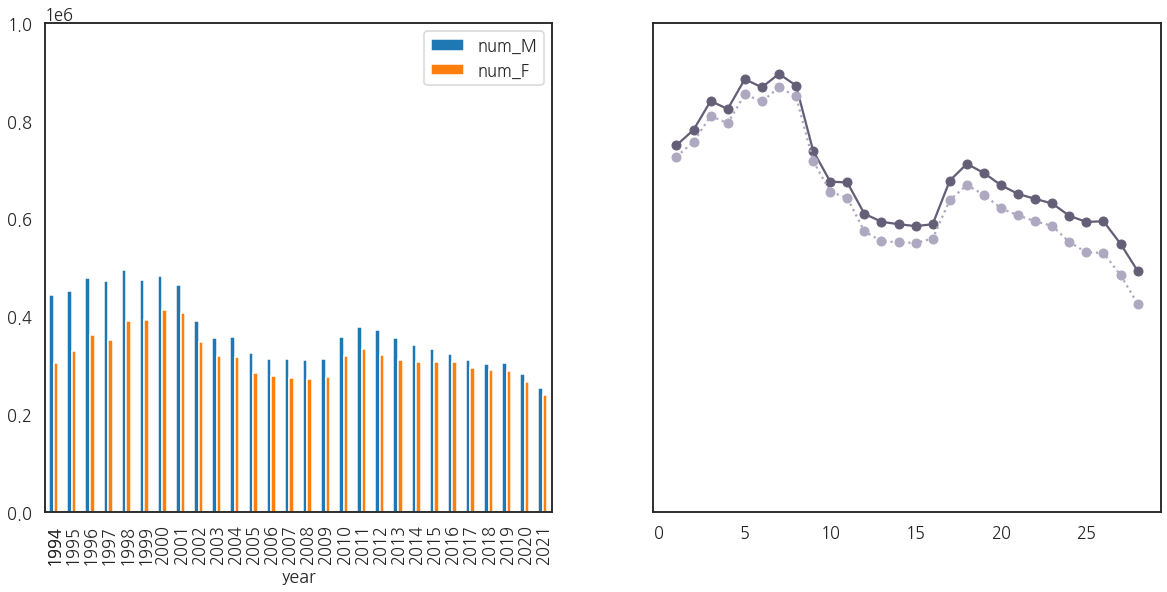

In [20]:
# subplot 두 개로 쪼개기
fig, axs = plt.subplots(ncols=2, figsize=(20, 9), sharey=True)

# x 데이터 추가
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=axs[0], zorder=0)

# x 데이터 제거
axs[1].plot(df_sn.loc[1:, "num_total"], 'o-', color=color_total, label="지원자 수")
axs[1].plot(df_sn.loc[1:, "num_test"], 'o:', color=color_test, label="응시자 수")

axs[1].set_ylim(0, 1000000)

+ line plot의 x축이 0부터 시작하는 것으로 바뀌었습니다.
+ 다시 x축 범위를 확인합니다.

In [21]:
xticks0 = axs[0].get_xticks()
xticks1 = axs[1].get_xticks()
print(f"xticks of axs[0] = {xticks0}")
print(f"xticks of axs[1] = {xticks1}")

xticks of axs[0] = [1994 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021]
xticks of axs[1] = [-5.  0.  5. 10. 15. 20. 25. 30.]


+ 느낌이 좋습니다.
+ 이제 둘을 같이 그려봅니다.

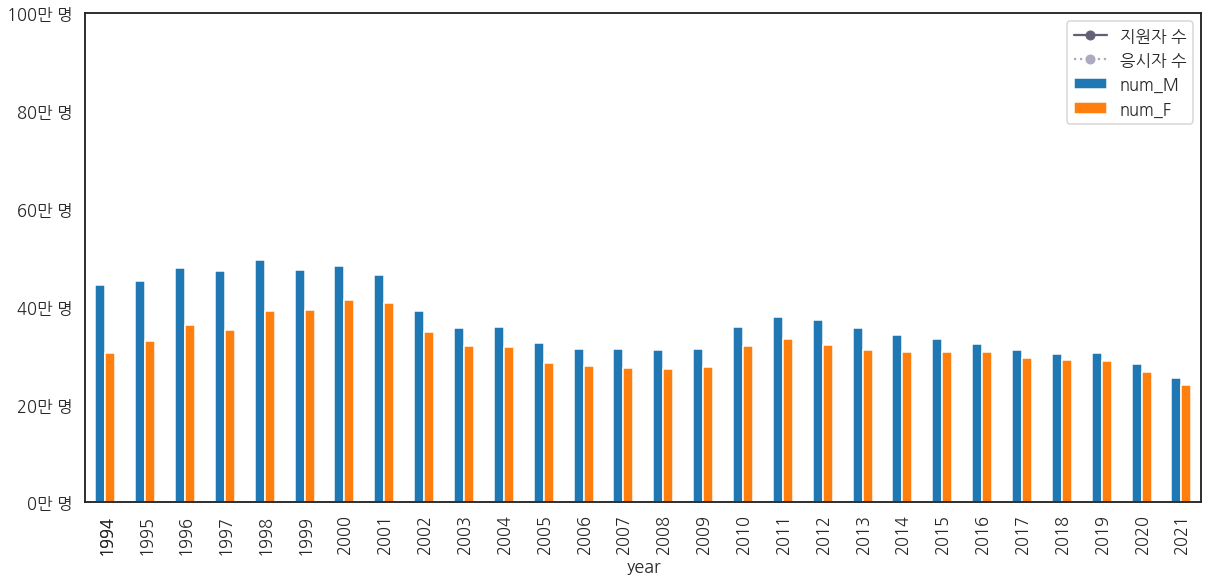

In [22]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax)

# x 데이터 범위 수정
ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

+ 아까 생략했던 1994년 여름 수능 데이터도 다시 살립니다.
+ 년도의 숫자가 아니라 **index가 기준**이기 때문에 **같은 값이 여럿 있어도 겹치지 않습니다.**

##### **2.6.4 성공**

+ 그림이 잘 나오는 것을 확인했습니다.
+ 이제 남성, 여성용으로 저장해 둔 색상을 입혀줍니다.
+ `pandas plot`의 multiple bar plot의 색상은 dictionary 형태로 지시합니다.

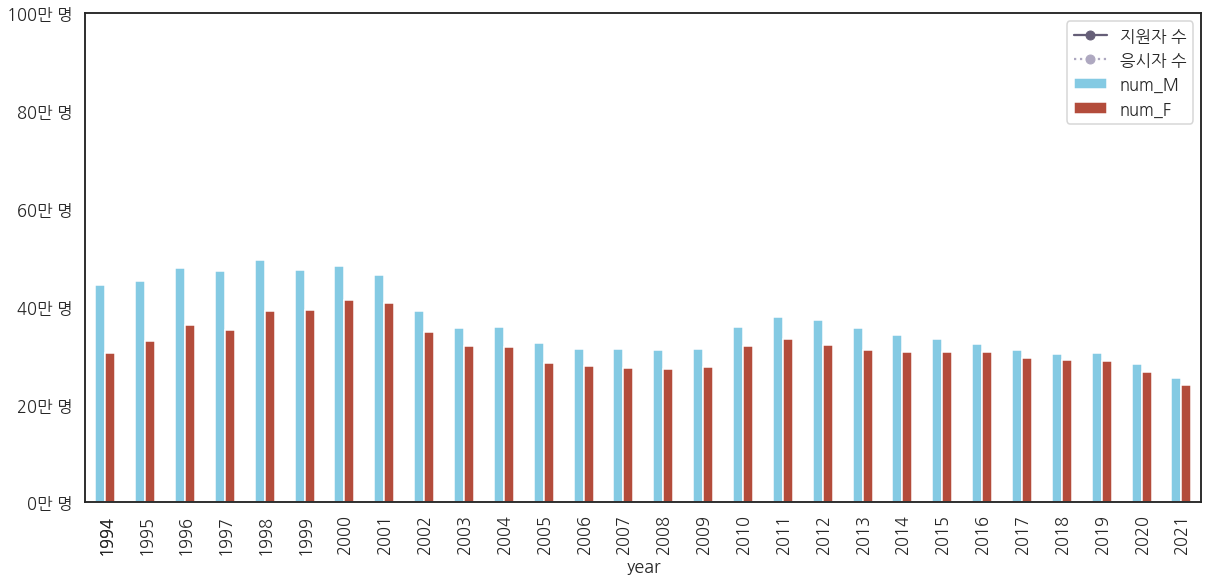

In [23]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

# bar color 반영
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

ax.legend()

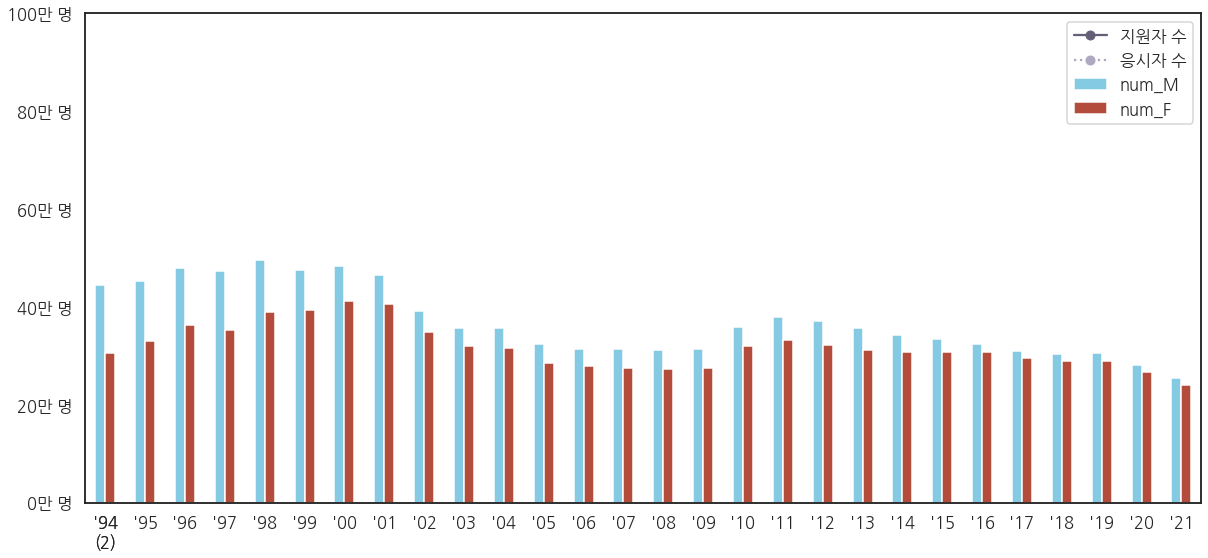

In [24]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M":color_M, "num_F":color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

# xticklabels 수정
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

# xlabels 제거
ax.set_xlabel("")

ax.legend()

[출처](https://jehyunlee.github.io/2020/12/17/Python-DS-48-suneung/)